# Minecraft Világgenerálás

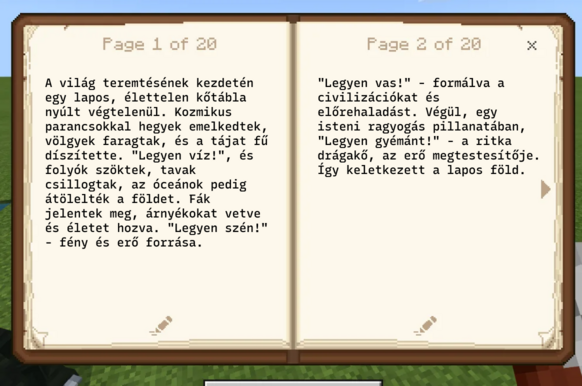

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
AIR =   '#00000000'
GRASS = '#489e09ff'
ROCK =  '#848685ff'
WATER = '#0384fc44'
WOOD = '#5e4211ff'
LEAVES = '#5ca90488'
CHERRY_LEAVES = '#ffc4f588'
DIRT = '#733c21ff'
IRON = '#CD9671ff'
COAL = '#343434ff'
DIAMOND = '#5cd9ff44'

COLORS = np.array([ AIR, GRASS, ROCK, WATER, WOOD, LEAVES, CHERRY_LEAVES, DIRT, IRON, COAL, DIAMOND ])

COLOR_MAP = {
    'AIR': 0,
    'GRASS': 1,
    'ROCK': 2,
    'WATER': 3,
    'WOOD': 4,
    'LEAVES': 5,
    'CHERRY_LEAVES': 6,
    'DIRT': 7,
    'IRON': 8,
    'COAL': 9,
    'DIAMOND': 10,
}

WIDTH = 16
DEPTH = 16
HEIGHT = 48

In [ ]:
def render(arr, title=''):
    width, depth, height = arr.shape

    X = np.arange(width, dtype=np.int8)
    Y = np.arange(depth, dtype=np.int8)
    Z = np.arange(height, dtype=np.int8)

    x, y, z = np.meshgrid(X, Y, Z)
    x, y, z = y.reshape(-1), x.reshape(-1), z.reshape(-1) # x and y is flipped because the plotting is flipped 180 so the z increases downwards

    # Magic
    if width == WIDTH and height == HEIGHT and depth == DEPTH:
        m = np.full((8, 8), fill_value=COLOR_MAP['GRASS'])
        m[np.unravel_index([17, 18, 21,22, 25, 26, 29, 30, 35, 36, 42, 43, 44, 45, 50, 51, 52, 53, 58, 61], shape=m.shape, order='C')] = COLOR_MAP['COAL']
        arr[4:12,4:12, HEIGHT-1:HEIGHT] = np.rot90(m[:,:,None], k=2)

    # Create a 3D plot
    ax = plt.figure(figsize=[10, 40]).add_subplot(111, projection='3d')

    color=COLORS[arr.reshape(-1)]

    ax.set_proj_type('ortho')
    ax.set_box_aspect((width , depth , height ))

    ax.bar3d(x, y, z, 1, 1, 1, color=color)
    elev, azim, roll = ax.elev, ax.azim, ax.roll
    ax.view_init(elev+180, azim+15, roll)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_xticks(X)
    ax.set_ylabel('Y')
    ax.set_yticks(Y)
    ax.set_zlabel('Z')
    ax.set_zticks(Z)
    ax.set_autoscalez_on(8)
    plt.title(title)

    # Show the plot
    plt.show()

# Töltsük fel kővel a chunkot a 10-ik magasságtól.

- np.zeros
- slicing
- dtype

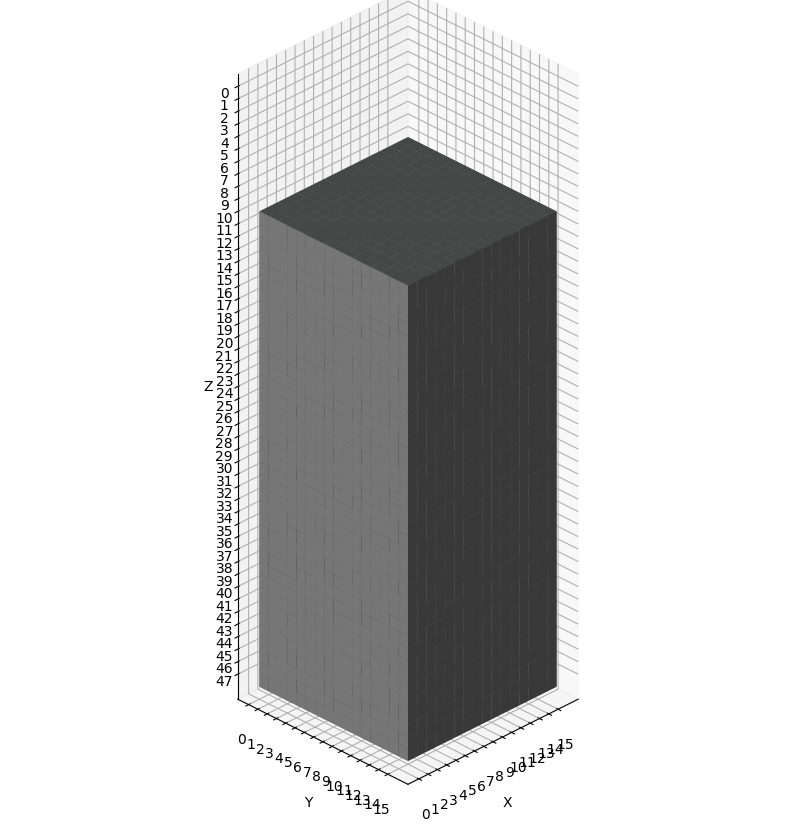

In [ ]:
chunk = np.zeros((WIDTH, DEPTH, HEIGHT), dtype=np.int64)
chunk[:,:,10:] = COLOR_MAP['ROCK']

render(chunk)

# Generáljunk terepet

A generáláshoz használjuk a $2 sin(x)$ függvényt a $[0; 6]$ intervallumon a következő képpen:

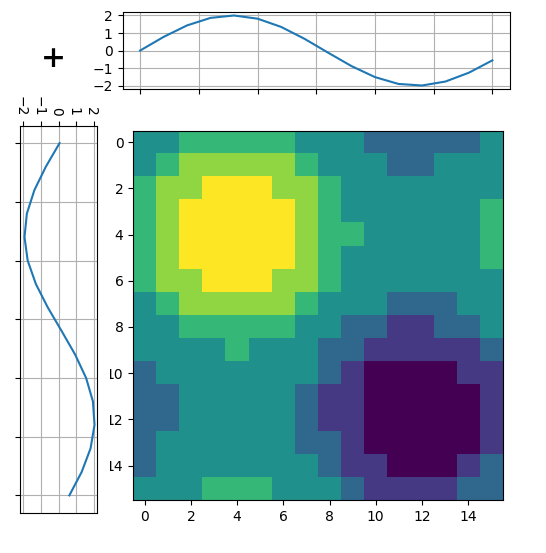

- np.linspace
- np.sin
- reshape
- astype
- T

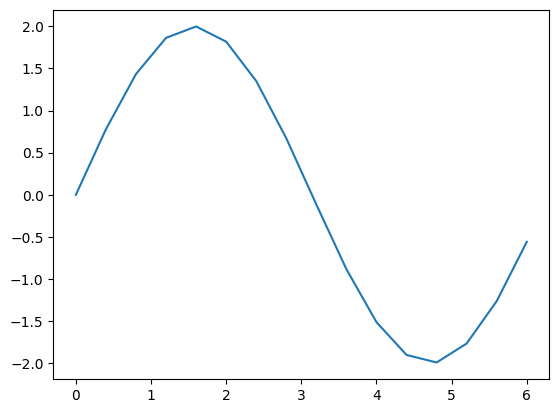

In [ ]:
x = np.linspace(0, 6, 16)
y = 2 * np.sin(x)

plt.plot(x, y)

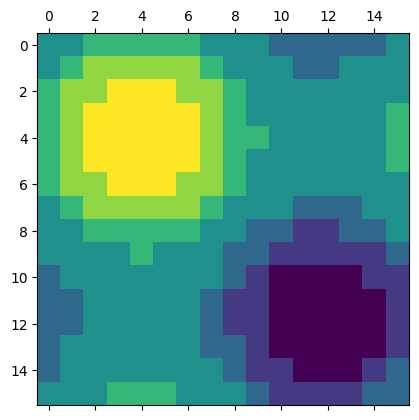

In [ ]:
y = y.reshape(-1, 1)
terrain = (y + y.T).astype(np.int8)
terrain = terrain + 10
plt.matshow(terrain)

- np.arange
- masking
- new axis

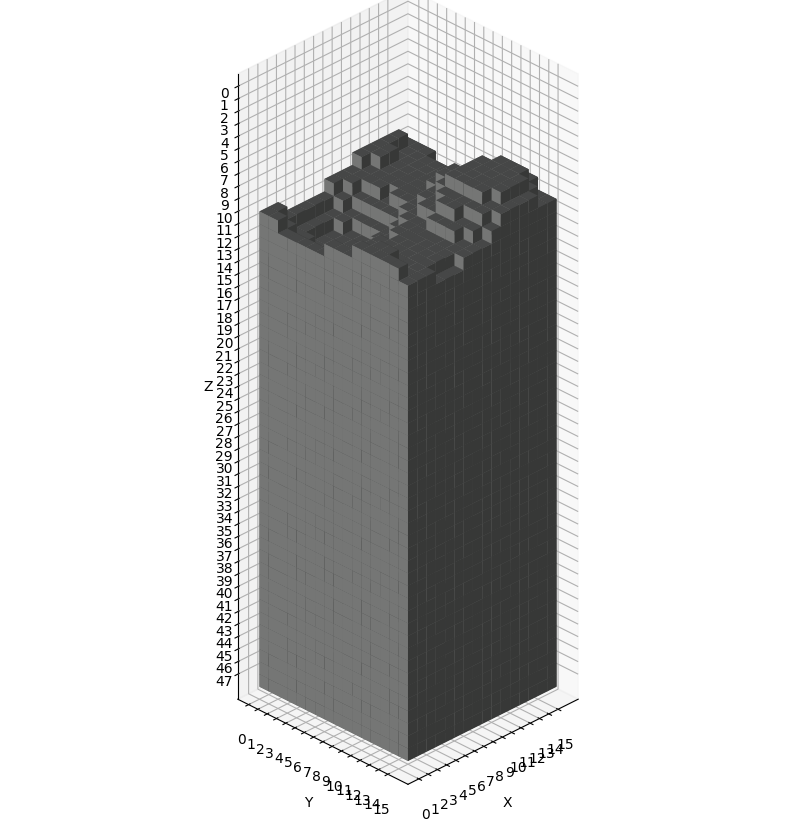

In [ ]:
z_index = np.arange(HEIGHT)

boolean_modifier = z_index < terrain[:, :, None]
chunk[boolean_modifier] = COLOR_MAP['AIR']
chunk[~boolean_modifier] = COLOR_MAP['ROCK']
render(chunk)

# Az átlag szintnél magasabb blokkok legyenek füvesek

- np.mean
- masking

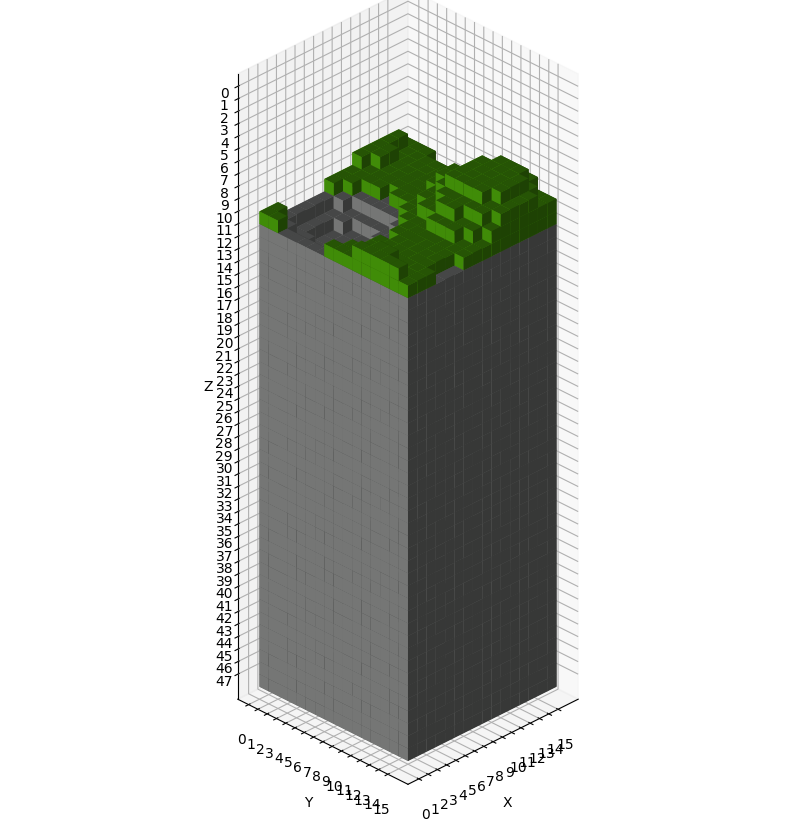

In [ ]:
water_level = np.mean(terrain).astype(np.int8) + 1
chunk[(z_index <= water_level) & (chunk != COLOR_MAP['AIR'])] = COLOR_MAP['GRASS']
render(chunk)

In [ ]:
(z_index < water_level).shape

(48,)

# Az átlag alatti részeket töltsük meg vízzel.

- slicing
- masking
- műveletek slice-on

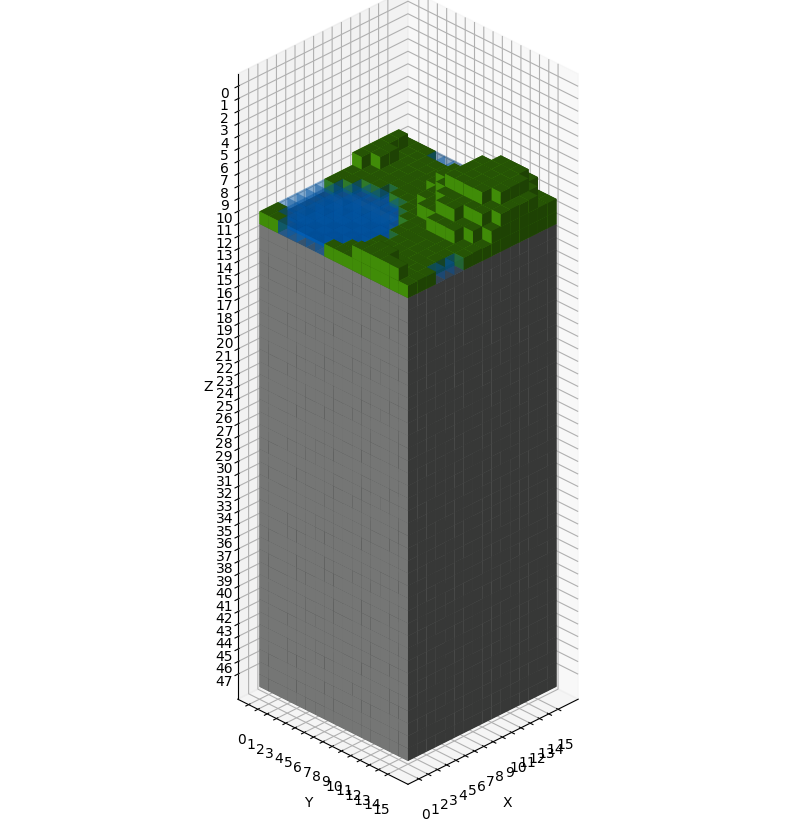

In [ ]:
chunk[(z_index >= water_level) & (chunk == COLOR_MAP['AIR'])] = COLOR_MAP['WATER']
render(chunk)

# Csináljunk fákat az alábbi ábra alapján.

![tree.png](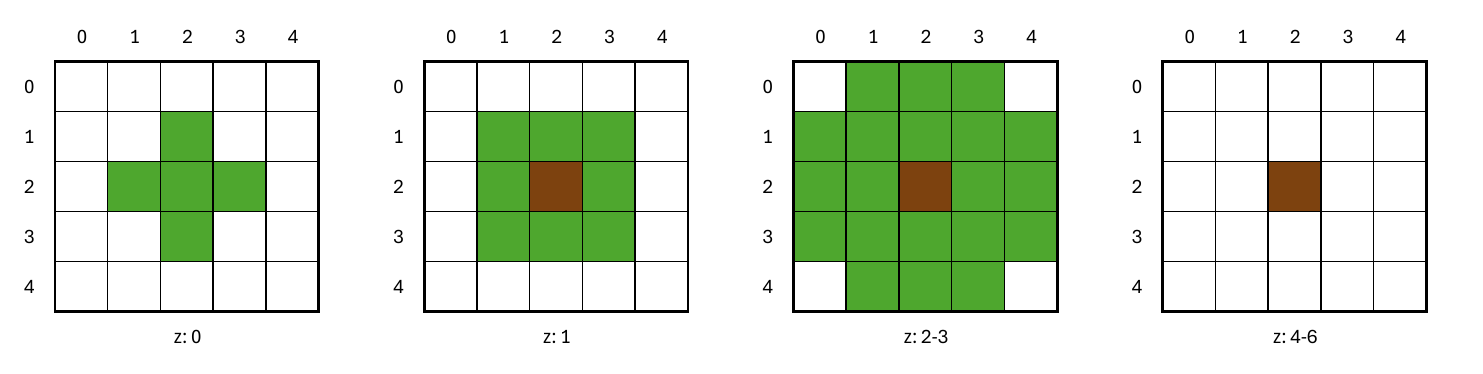
)

- np.full
- slicing több axis mentén

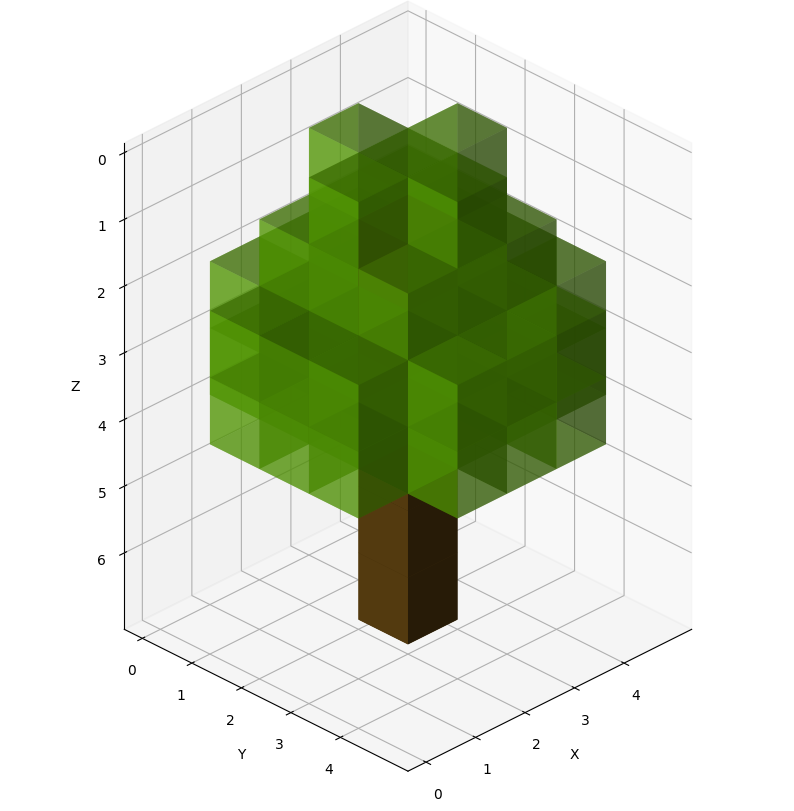

In [ ]:
tree = np.zeros((5, 5, 7), dtype=np.int64)
tree[1:4,2,0] = COLOR_MAP['LEAVES']
tree[2,1:4,0] = COLOR_MAP['LEAVES']
tree[1:4,1:4,1] = COLOR_MAP['LEAVES']
tree[1:4,:,2:4] = COLOR_MAP['LEAVES']
tree[:,1:4,2:4] = COLOR_MAP['LEAVES']
tree[2,2,1:] = COLOR_MAP['WOOD']

render(tree)

# Klónozzuk le a fát és csináljuk cherry blossom fát.

- ndarray.copy
- ndarray.view
- np.shares_memory

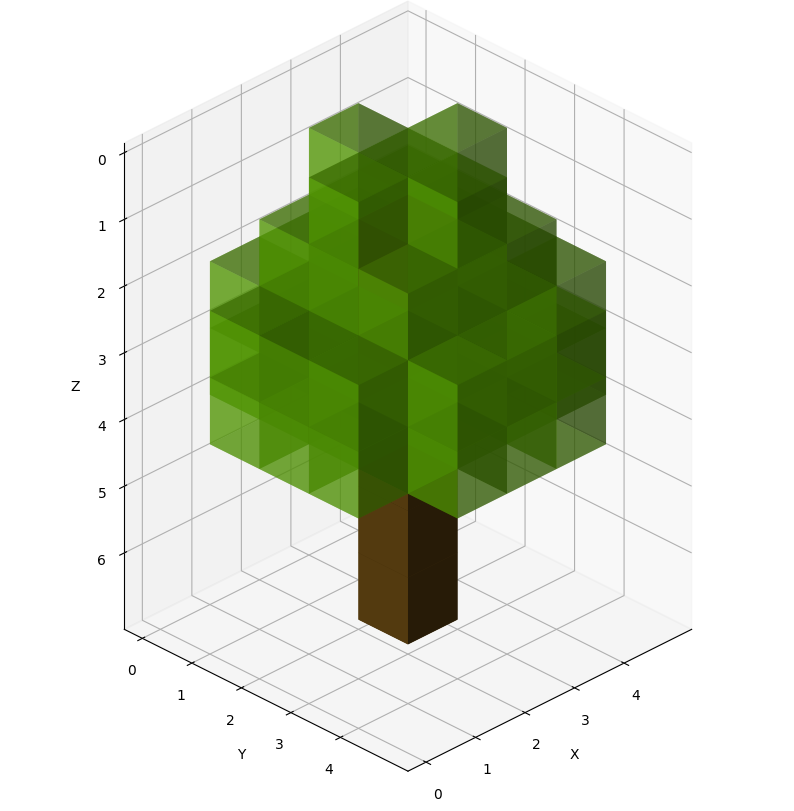

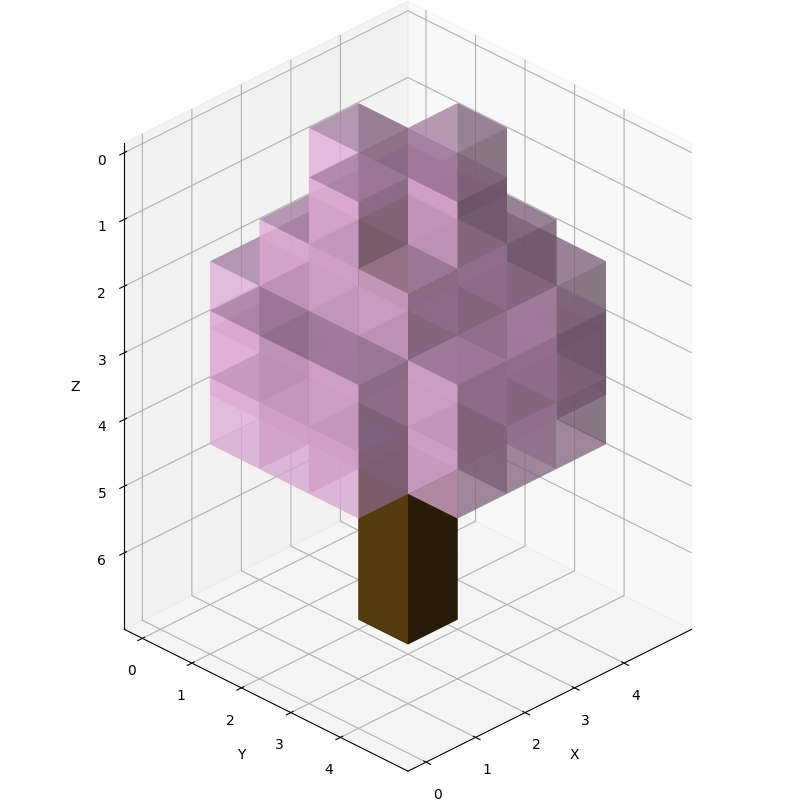

In [ ]:
oak = tree.copy()
cherry_tree = oak.copy()

cherry_tree[cherry_tree == COLOR_MAP['LEAVES']] = COLOR_MAP['CHERRY_LEAVES']

render(oak)
render(cherry_tree)

# Adjunk személyiséget a fáknak.

- np.random.shuffle
- copy

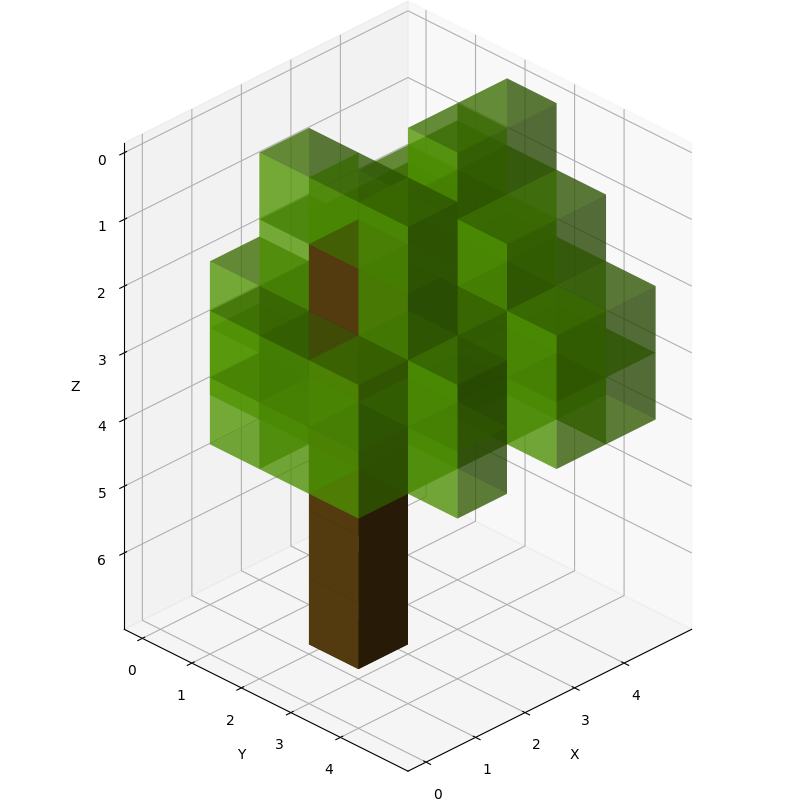

In [ ]:
random_tree = tree.copy()
np.random.shuffle(random_tree)

render(random_tree)

- np.random.shuffle
- indexing
- np.arange
- copy

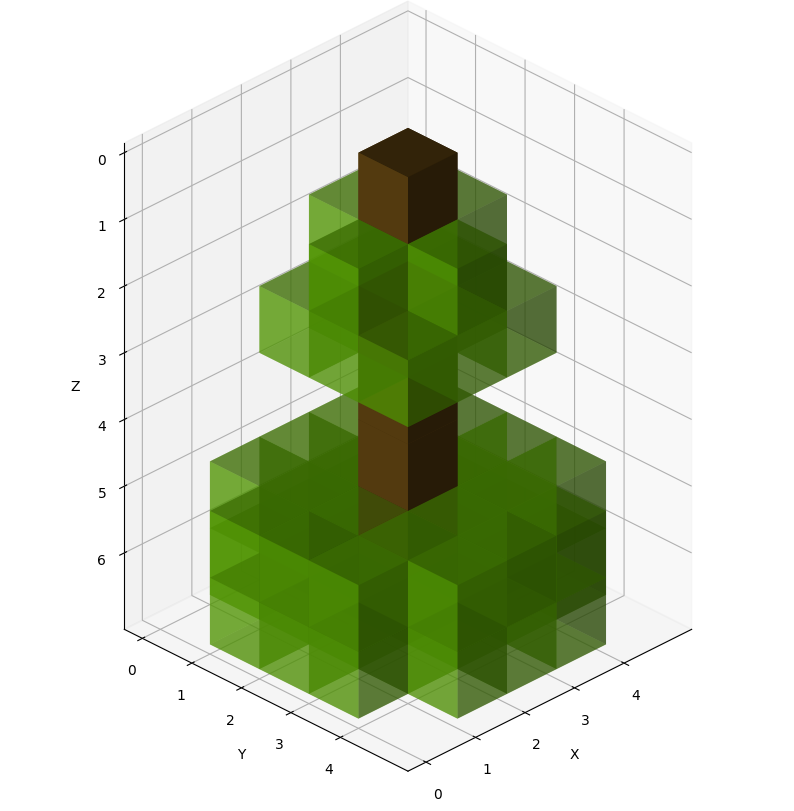

In [ ]:
indices = np.arange(7)
random_tree = tree.copy()

np.random.shuffle(indices)
render(random_tree[:,:,indices])

# Helyezzük el a fákat a terepen.

- astype
- indexing
- slice-ba másolás

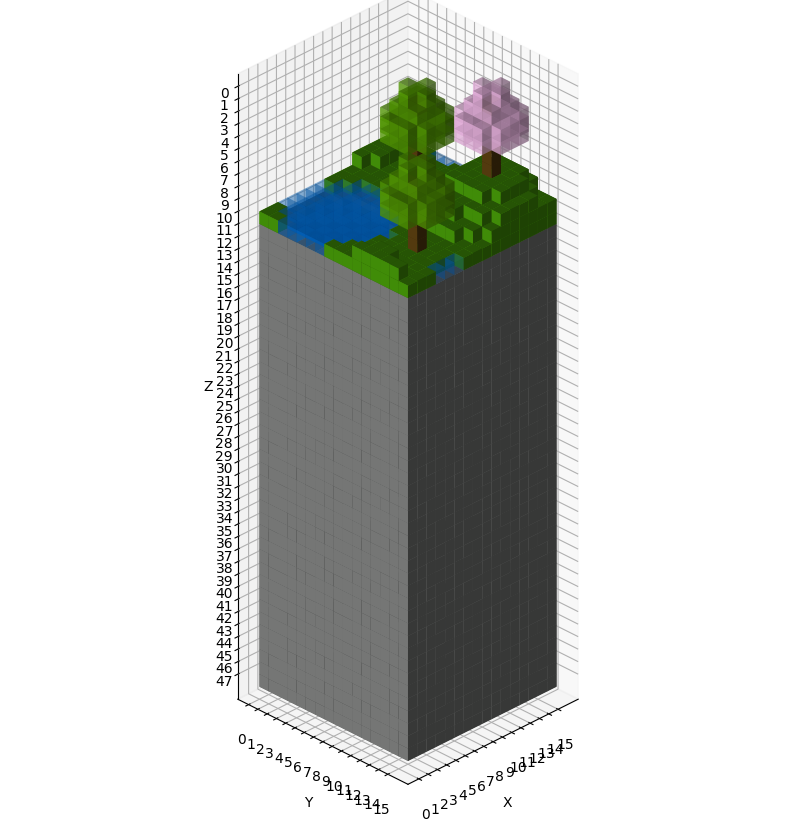

In [ ]:
chunk_c = chunk.view()

w, d, h = oak.shape
chunk_c[2:2+w, 10:10+d, water_level-h:water_level] = oak
chunk_c[10:10+w, 2:2+d, water_level-h:water_level] = oak
chunk_c[10:10+w, 10:10+d, water_level-3-h:water_level-3] = cherry_tree
render(chunk_c)

# Rakjuk barlangokat a köves rétegbe.

1. Egy barlang 20-27-ik rétegekbe.
2. Egy barlang 30-37-ik rétegekbe.

- slicing

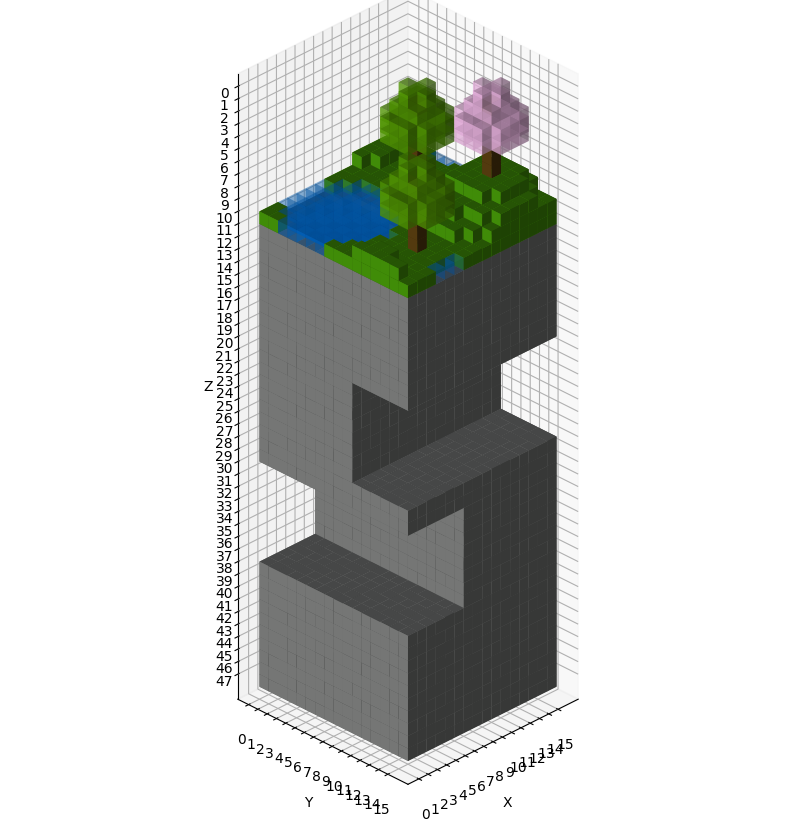

In [ ]:
chunk_c = chunk.view()

chunk_c[:,10:,20:28] = COLOR_MAP['AIR']
chunk_c[0:6,:,30:38] = COLOR_MAP['AIR']

render(chunk_c)

# Generáljunk érceket a barlangos részekre.

- A felső barlangos rész minden második rétegébe kerüljön random szórással szén.
- Az alsó barlangos rész minden második rétegébe kerüljön random szórással vasérc.
- Az ércek 60%-os valószinűséggel generálódjanak egy adott indexre.

basic -> advanced - működik

- np.random.choice
- slicing
- copy

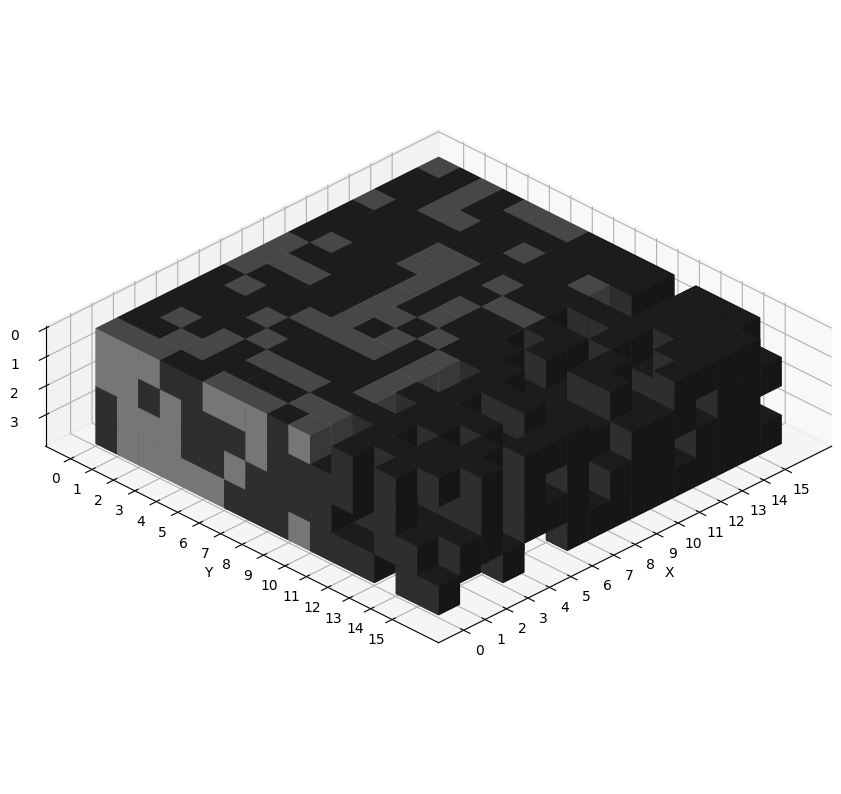

In [ ]:
chunk_c = chunk.copy()

slice = chunk_c[:,:,20:28:2]

coal_mask = np.random.choice([True, False], size=slice.shape, p=[0.6, 0.4])
slice[coal_mask] = COLOR_MAP['COAL']
render(slice)

basic -> advanced -> advanced - nem működik

- copy
- masking
- basic és advance indexing közti külömbség

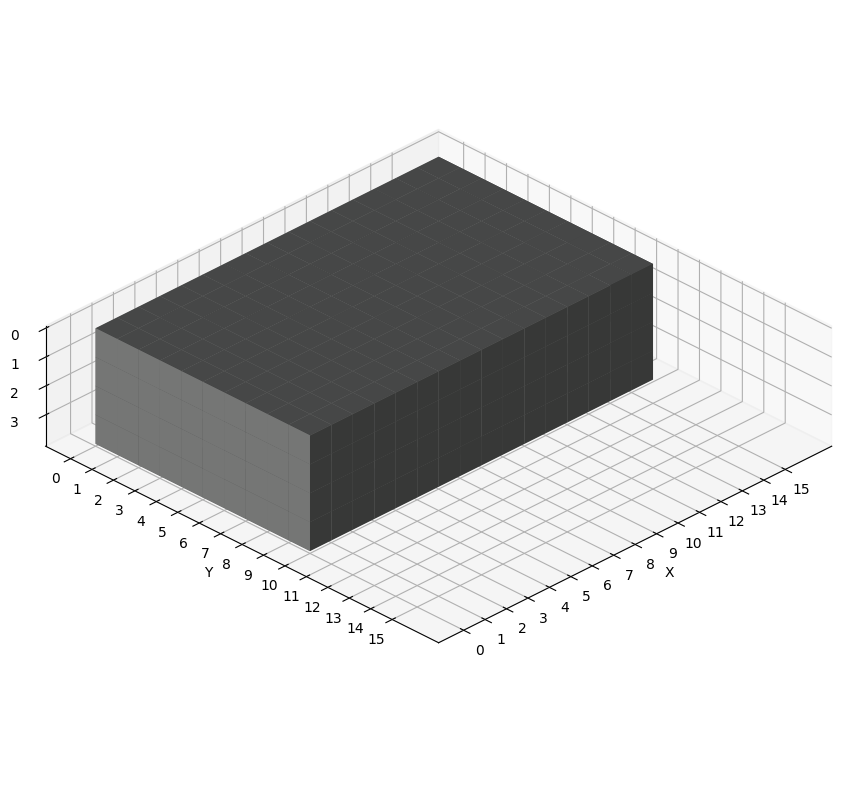

In [ ]:
chunk_c = chunk.copy()

slice = chunk_c[:,:,20:28:2]

coal_mask = np.random.choice([True, False], size=slice[slice != COLOR_MAP['AIR']].shape, p=[0.6, 0.4])
slice[slice != COLOR_MAP['AIR']][coal_mask] = COLOR_MAP['COAL']
render(slice)

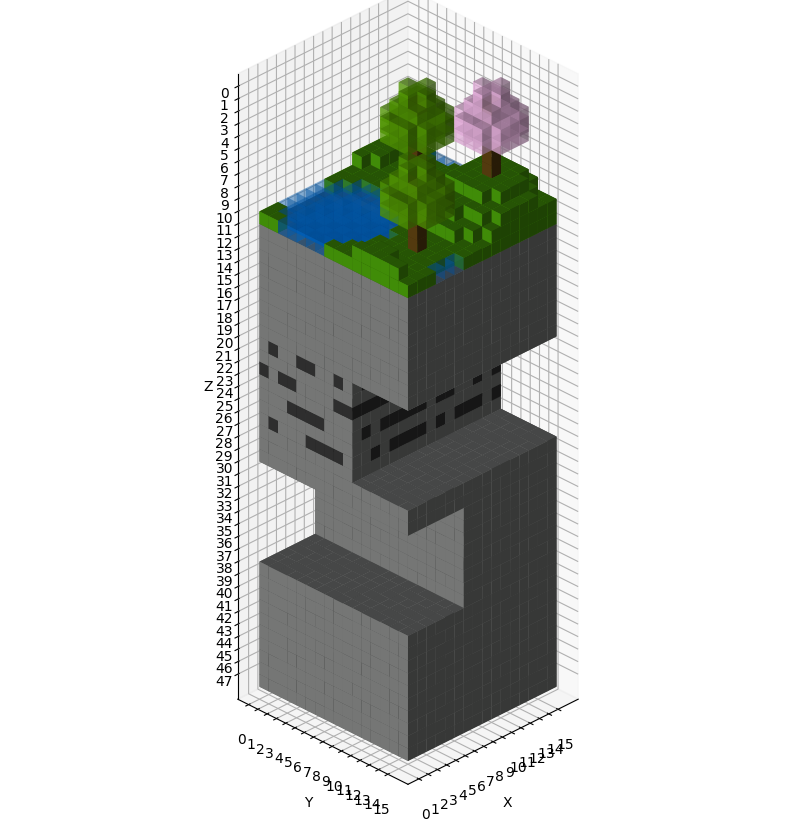

In [ ]:
chunk_c = chunk.view()

slice = chunk_c[:,:,20:28:2]

not_air = slice != COLOR_MAP['AIR']
coal_mask = np.random.choice([True, False], size=slice.shape, p=[0.6, 0.4])
slice[not_air & coal_mask] = COLOR_MAP['COAL']
render(chunk_c)

- view
- slicing
- random.choice
- masking

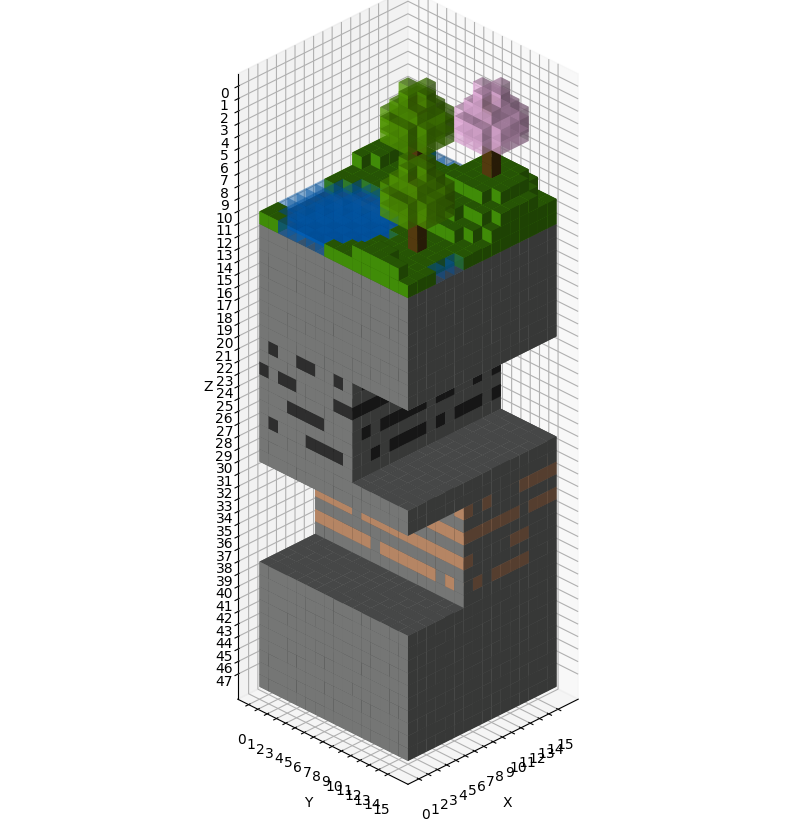

In [ ]:
chunk_c = chunk.view()

slice = chunk_c[:,:,30:38:2]

not_air = slice != COLOR_MAP['AIR']
iron_mask = np.random.choice([True, False], size=slice.shape, p=[0.6, 0.4])
slice[not_air & iron_mask] = COLOR_MAP['IRON']
render(chunk_c)

# Helyezzünk el 15 gyémánt blokkot véletlenszerűen a 40-45 rétegek között.

- np.random.randint
- np.unravel_index
- slicing
- view
- hogyan működik a slicing

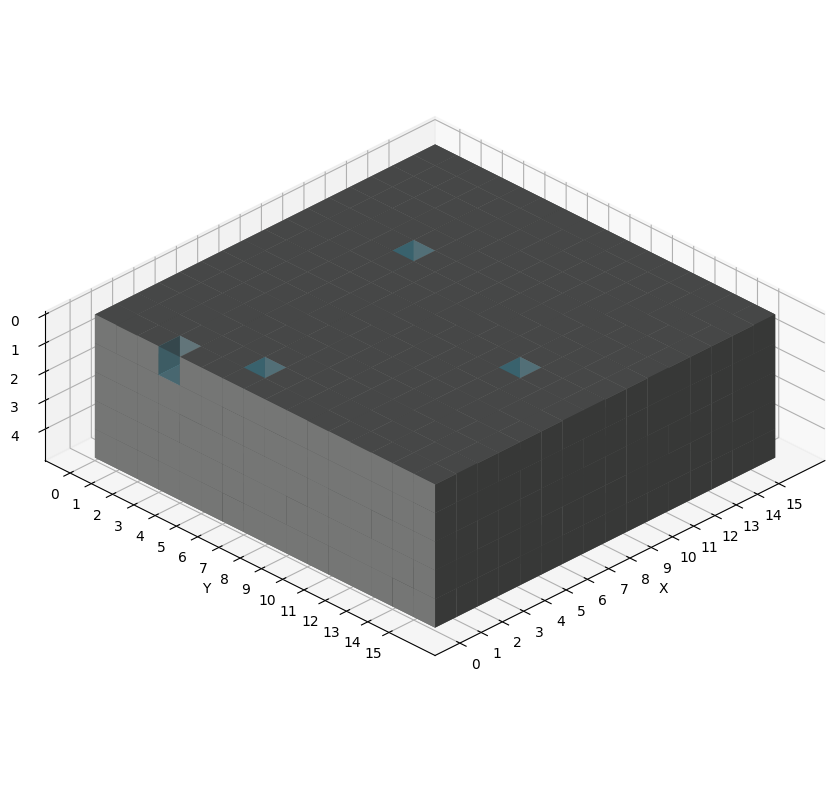

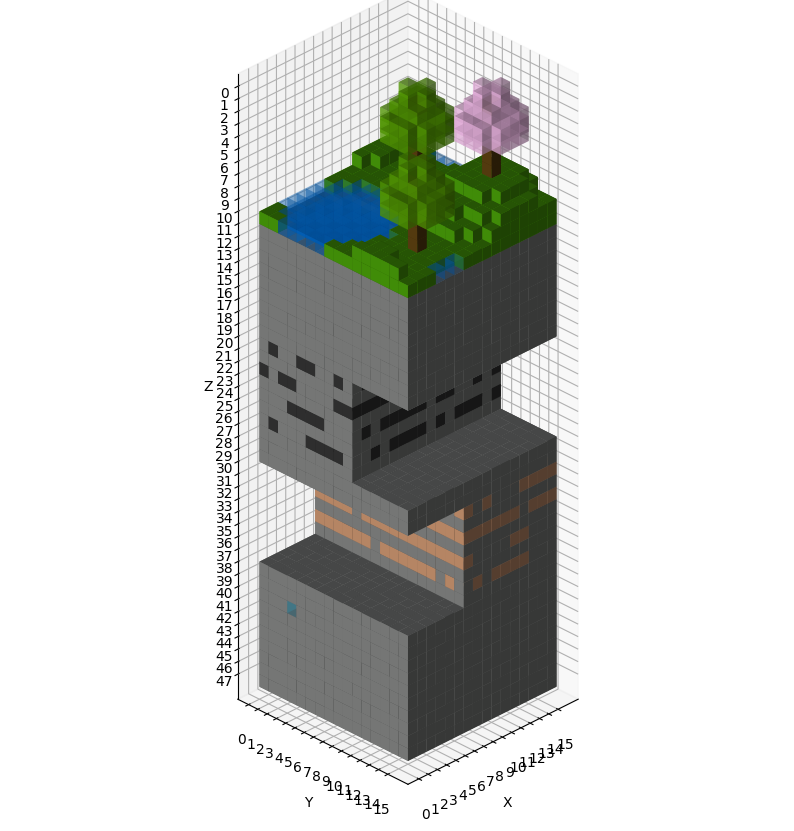

In [ ]:
chunk_c = chunk.copy()

slice = chunk_c[:,:,40:45]
w, d, h = slice.shape
random_numbers = np.random.randint(w*d*h, size=15)
diamond_indices = np.unravel_index(random_numbers, slice.shape)
slice[diamond_indices] = COLOR_MAP['DIAMOND']
render(slice)
render(chunk_c)

- np.random.randint
- slicing
- view
- hogyan működik a slicing

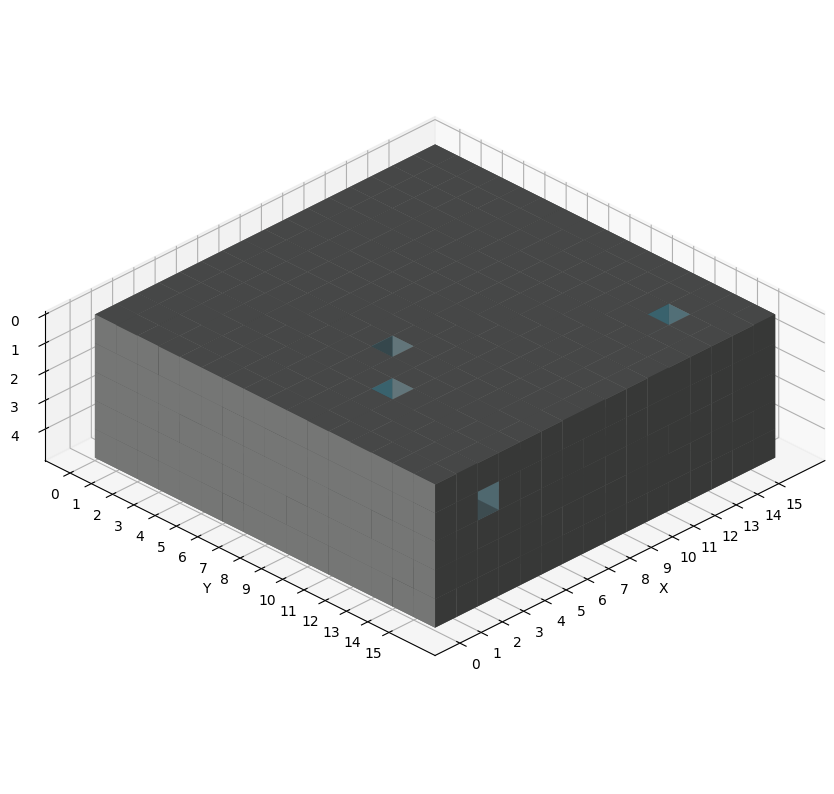

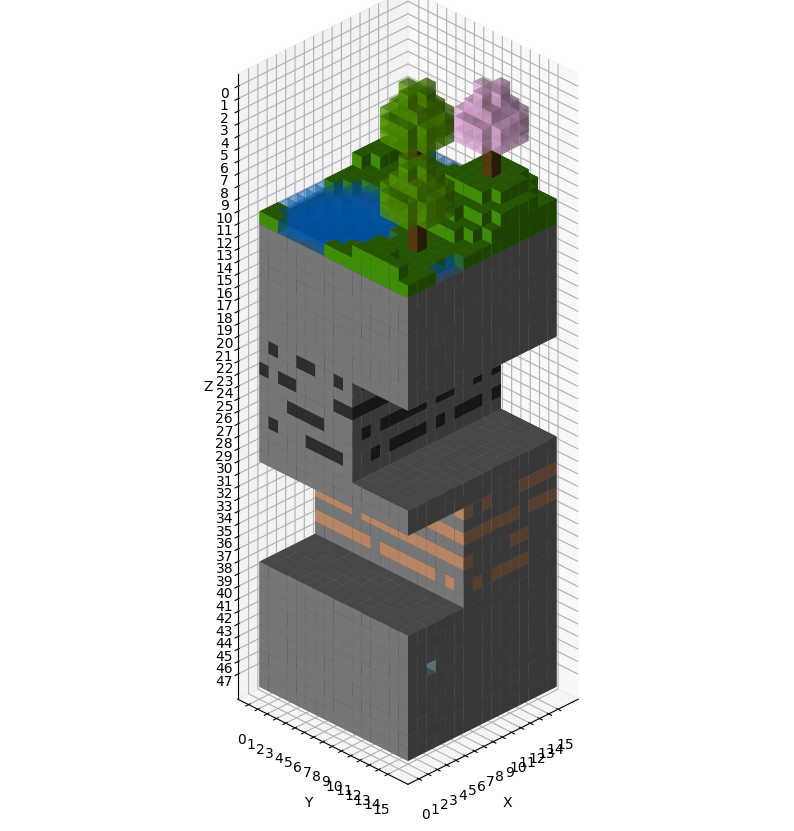

In [ ]:
chunk_c = chunk.view()

slice = chunk_c[:,:,40:45]
diamond_indices = np.random.randint(slice.shape, size=(15, 3))
slice[tuple(diamond_indices.T)] = COLOR_MAP['DIAMOND']
render(slice)
render(chunk_c)

# Implementáljuk a *rontgen* függvényt, hogy belelássunk a chunkba.

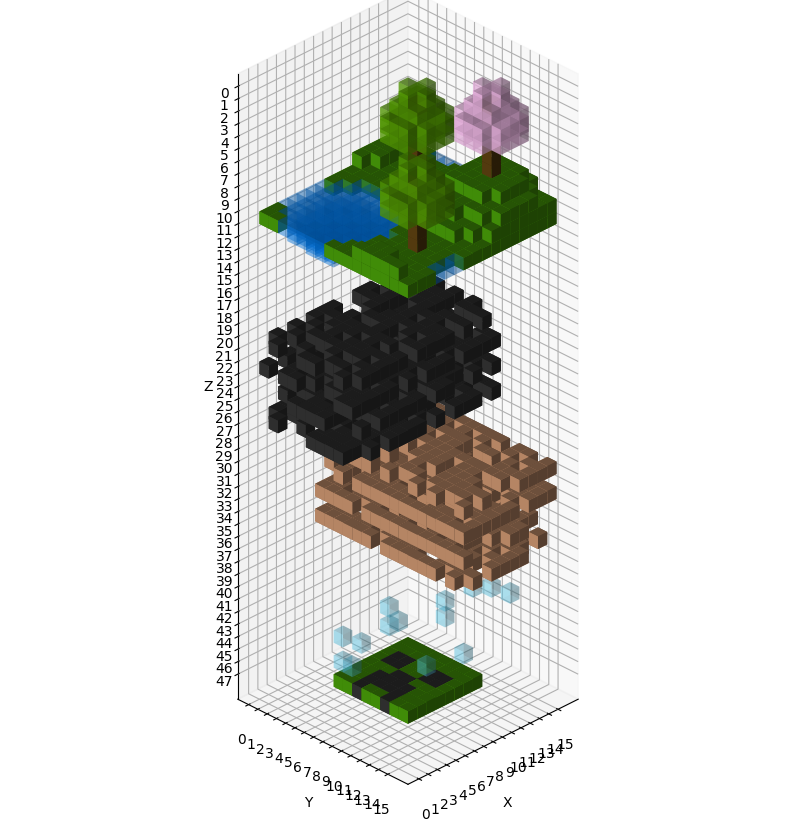

In [ ]:
def rontgen(chunk):
    c = chunk.copy()
    c[c == COLOR_MAP['ROCK']] = COLOR_MAP['AIR']
    return c

render(rontgen(chunk))